#Prepare a prediction model for profit of 50_startups data.
#Do transformations for getting better predictions of profit and
#make a table containing R^2 value for each prepared model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [3]:
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.shape

(50, 5)

In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [141]:
data.duplicated().sum()

0

In [8]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [9]:
data.corr()

<ipython-input-9-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [11]:
data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [12]:
data.shape

(50, 5)

In [13]:
df=pd.DataFrame(data)
df_encoded=pd.get_dummies(df, columns=['State'])
df_encoded.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [14]:
df_encoded.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


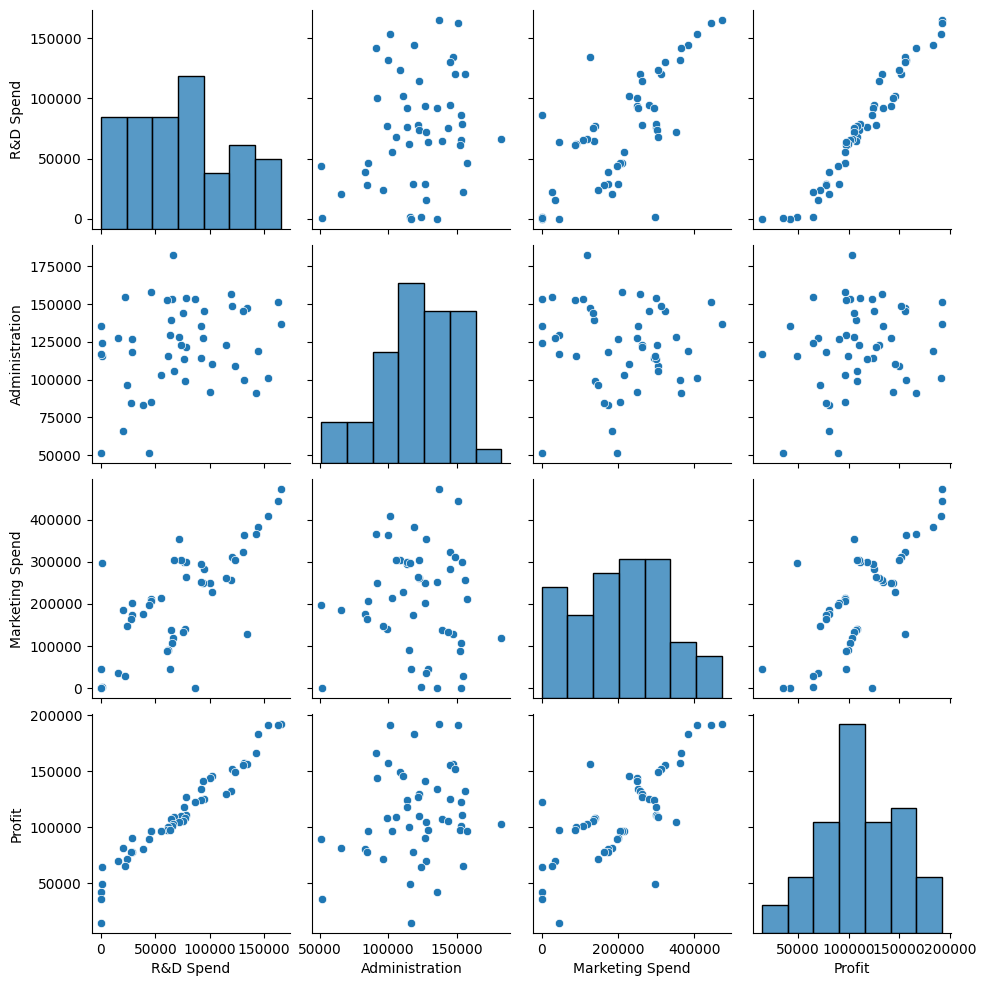

In [15]:
import seaborn as sns
sns.pairplot(data)

In [16]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

<ipython-input-17-e4122560aebc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['R&D Spend'])


<Axes: xlabel='R&D Spend', ylabel='Density'>

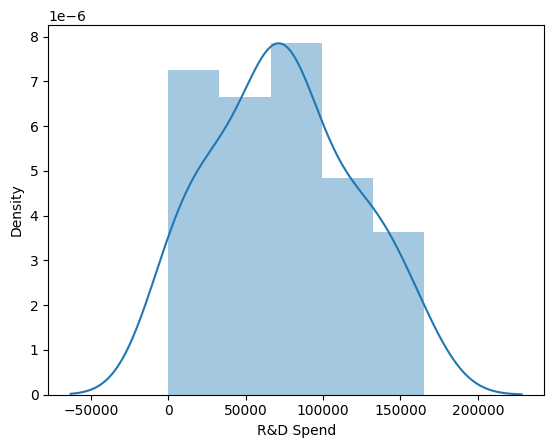

In [17]:
sns.distplot(data['R&D Spend'])

<ipython-input-18-4bee9cb1f6ca>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Administration'])


<Axes: xlabel='Administration', ylabel='Density'>

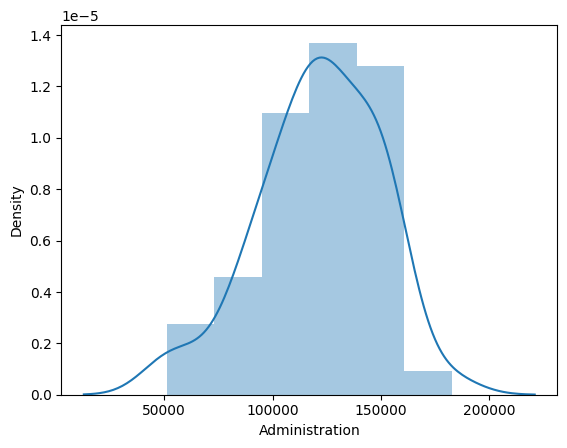

In [18]:
sns.distplot(data['Administration'])

<ipython-input-19-cf32ea61cd4d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Marketing Spend'])


<Axes: xlabel='Marketing Spend', ylabel='Density'>

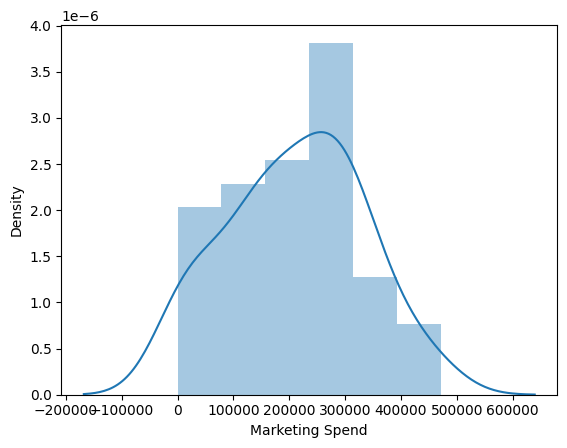

In [19]:
sns.distplot(data['Marketing Spend'])

<ipython-input-20-5c9dc59bcdb4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Profit'])


<Axes: xlabel='Profit', ylabel='Density'>

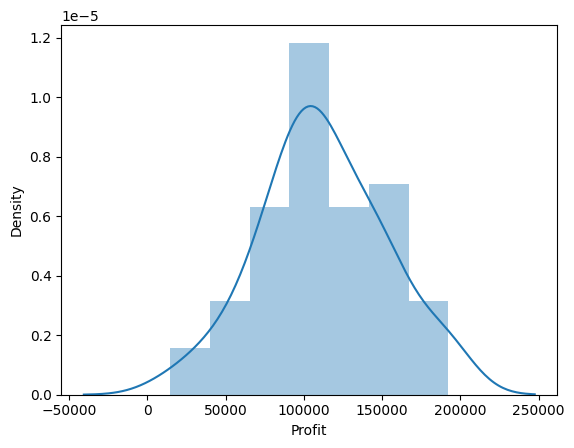

In [20]:
sns.distplot(data['Profit'])

In [21]:
#there is a correlation between the independent variables R&D Spend and Marketing Spend

In [22]:
x=pd.DataFrame(data, columns=['R&D Spend', 'Administration', 'Marketing Spend'])
x.head()
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]



In [23]:
vif

,Features,VIF
0,R&D Spend,8.384571
1,Administration,4.026406
2,Marketing Spend,7.593984


In [24]:
#model with no transformation and including all independent variables
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [25]:
import statsmodels.formula.api as smf
df_encoded.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [26]:
df_encoded=df_encoded.rename({'R&D Spend': 'RD', 'Marketing Spend': 'MK', 'State_New York' : 'State_New_York'}, axis=1)

In [27]:
df_encoded.head()

,RD,Administration,MK,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [28]:
df_encoded.Administration	.skew()   # Administatrion column has a moderate level negative skewness

-0.4890248099671768

In [29]:
df_encoded.MK.skew()

-0.04647226758360412

In [30]:
df_encoded.RD.skew()

0.164002172321177

In [31]:
model1=smf.ols('Profit~ RD+ Administration+ MK +State_California + State_Florida + State_New_York', data=df_encoded).fit()
model1.params

Intercept           37633.233317
RD                      0.806023
Administration         -0.027004
MK                      0.026980
State_California    12492.110514
State_Florida       12690.899307
State_New_York      12450.223495
dtype: float64

In [32]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           1.34e-27
Time:                        05:09:57   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD                   0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
MK                   0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_New_York    1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.48e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.2e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
model1.pvalues   # the p-values are less than 0.05 which indicates that all variables are significant in predicting price

Intercept           2.807645e-09
RD                  2.578772e-21
Administration      6.077373e-01
MK                  1.226769e-01
State_California    6.942555e-06
State_Florida       2.992503e-05
State_New_York      9.409010e-06
dtype: float64

In [34]:
# preparing model droping state column
model2=smf.ols('Profit~ RD+ Administration+ MK', data=df_encoded).fit()
model2.params

Intercept         50122.192990
RD                    0.805715
Administration       -0.026816
MK                    0.027228
dtype: float64

In [35]:
(model2.rsquared, model2.rsquared_adj)           # the adjusted r2 adjusted value increased from 0.945 to 0.947 by excluding state column

(0.9507459940683246, 0.9475337762901719)

In [36]:
model2.pvalues

Intercept         1.057379e-09
RD                2.634968e-22
Administration    6.017551e-01
MK                1.047168e-01
dtype: float64

In [37]:
# since there is correlation between R&D spent and Marketing we check accuarcy by including any one of them
model3= smf.ols('Profit~ RD+ Administration', data=df_encoded).fit()
(model3.rsquared, model3.rsquared_adj)

(0.9478129385009173, 0.9455922124796797)

In [38]:
model4= smf.ols('Profit~ MK+ Administration', data=df_encoded).fit()   # the r2 value decreased by removing R&D column
(model4.rsquared, model4.rsquared_adj)

(0.6097229746770664, 0.5931154416846012)

In [39]:
# model by dropping administration column
model5= smf.ols('Profit~ RD+ MK', data=df_encoded).fit()       # r2 adjusted value increased  to 0.948 by dropping administration column adjusted value increased
(model5.rsquared, model5.rsquared_adj)

(0.9504503015559763, 0.9483418037498477)

In [40]:
model5.params

Intercept    46975.864221
RD               0.796584
MK               0.029908
dtype: float64

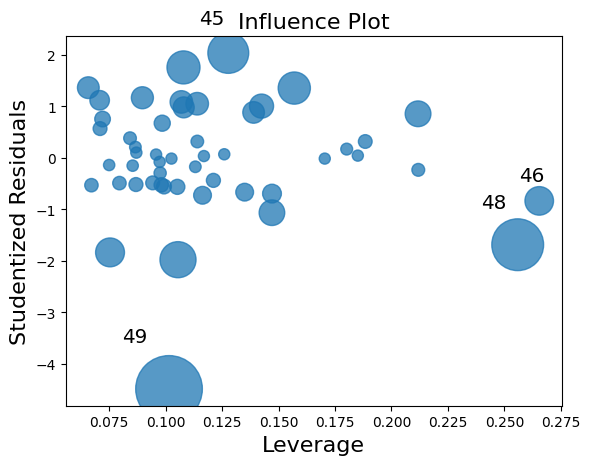

In [41]:
# Checking whether data has any influential values
# influence index plots
import statsmodels.api as sm
sm.graphics.influence_plot(model1, criterion='cooks')            # datapoint 48,46 has a greater leverage value
plt.show();

In [42]:
df_encoded_new= df_encoded.drop(df_encoded.index[[46,48]], axis=0)

In [43]:
df_encoded_new.shape

(48, 7)

In [44]:
# building model
model6=smf.ols('Profit~ RD+ Administration+ MK', data=df_encoded_new).fit()
model6.params

Intercept         54990.131397
RD                    0.793643
Administration       -0.053994
MK                    0.026382
dtype: float64

In [45]:
(model6.rsquared, model6.rsquared_adj)      # the model actually gave 0.951% without droping any row

(0.9476328184406568, 0.9440623287888834)

In [46]:
df_encoded.head()

,RD,Administration,MK,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [47]:
df_encoded.shape

(50, 7)

In [48]:
# by performing square root transformation on independent variables
df_encoded_sq=pd.DataFrame()
df_encoded_sq[['RD', 'Administration', 'MK']] = np.sqrt(df_encoded[['RD', 'Administration', 'MK']])
df_encoded_sq['Profit']= df_encoded['Profit']
df_encoded_sq.head()

,RD,Administration,MK,Profit
0,406.631529,369.997027,686.865416,192261.83
1,403.234051,389.072731,666.257105,191792.06
2,391.716109,318.033882,638.697534,191050.39
3,379.963696,344.487808,619.031195,182901.99
4,376.971272,302.310718,605.118517,166187.94


In [49]:
m=smf.ols('Profit~ RD+ Administration+ MK', data=df_encoded_sq).fit()
m.rsquared

0.9079571755611123

In [163]:
# by performing log root transformation on independent variables
df_encoded_log=pd.DataFrame()
df_encoded_log[['RD', 'Administration', 'MK','Profit']] = np.log(df_encoded[['RD', 'Administration', 'MK','Profit']])
df_encoded_log.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,RD,Administration,MK,Profit
0,12.015815,11.826990,13.064277,12.166613
1,11.999034,11.927533,13.003351,12.164167
2,11.941075,11.524316,12.918862,12.160292
3,11.880151,11.684117,12.856311,12.116706
4,11.864338,11.422911,12.810849,12.020875


In [166]:
df_encoded_log.isna().sum()

RD                0
Administration    0
MK                0
Profit            0
dtype: int64

In [165]:
np.isinf(df_encoded_log).sum()

RD                2
Administration    0
MK                3
Profit            0
dtype: int64

In [167]:
df_encoded_log=df_encoded_log.dropna()

In [168]:
np.isinf(df_encoded_log).sum()

RD                2
Administration    0
MK                3
Profit            0
dtype: int64

In [169]:
df_encoded_log.replace([np.inf, -np.inf], np.nan, inplace=True)
df_encoded_log.dropna(inplace=True)

In [170]:
np.isinf(df_encoded_log).sum()

RD                0
Administration    0
MK                0
Profit            0
dtype: int64

In [171]:
m2=smf.ols('Profit~ RD+ Administration+ MK', data=df_encoded_log).fit()
(m2.rsquared, m2.rsquared_adj)

(0.7376373888816574, 0.7188972023732043)

In [50]:
#FINAL MODEL
final_model=smf.ols('Profit~ RD+ Administration+ MK', data=df_encoded).fit()
final_model.params

Intercept         50122.192990
RD                    0.805715
Administration       -0.026816
MK                    0.027228
dtype: float64

In [51]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           4.53e-30
Time:                        05:09:59   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MK                 0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
pred=final_model.predict(df_encoded)

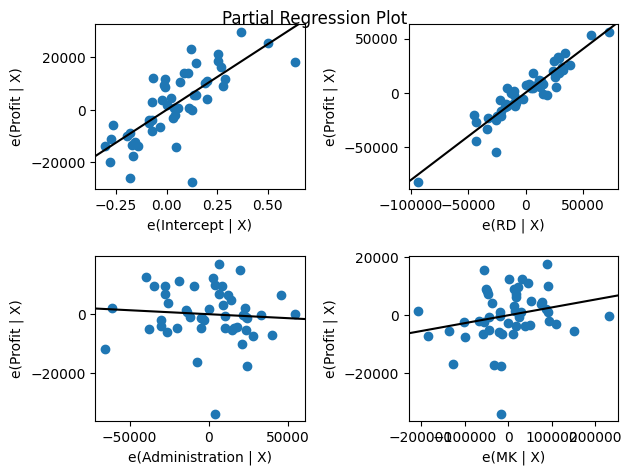

In [53]:
sm.graphics.plot_partregress_grid(final_model)
plt.show();

Text(0, 0.5, 'fitted values')

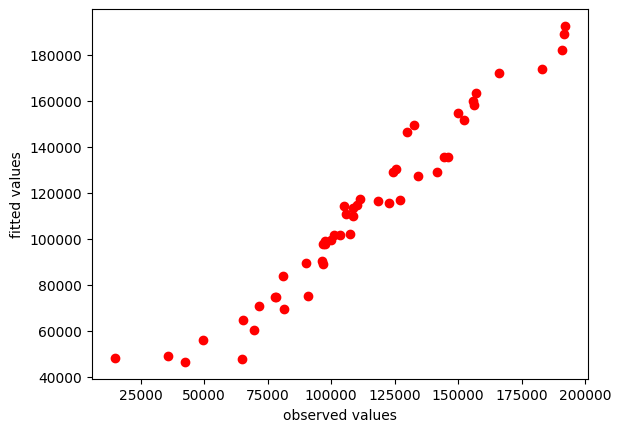

In [54]:
plt.scatter(df_encoded.Profit, pred, c='r')
plt.xlabel('observed values')
plt.ylabel('fitted values')

Text(0, 0.5, 'Error')

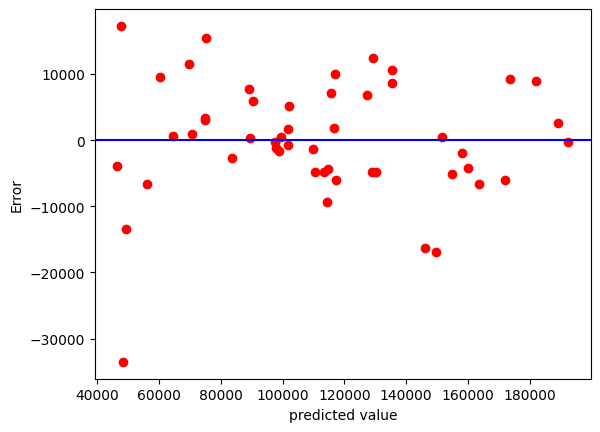

In [55]:
plt.scatter(pred,final_model.resid, c='r' )
plt.axhline(y=0,color='blue')
plt.xlabel('predicted value')
plt.ylabel('Error')

(array([ 1.,  0.,  0.,  3.,  1., 12., 15.,  6.,  9.,  3.]),
 array([-33533.7341113 , -28452.81766886, -23371.90122642, -18290.98478398,
        -13210.06834154,  -8129.1518991 ,  -3048.23545666,   2032.68098578,
          7113.59742822,  12194.51387065,  17275.43031309]),
 <BarContainer object of 10 artists>)

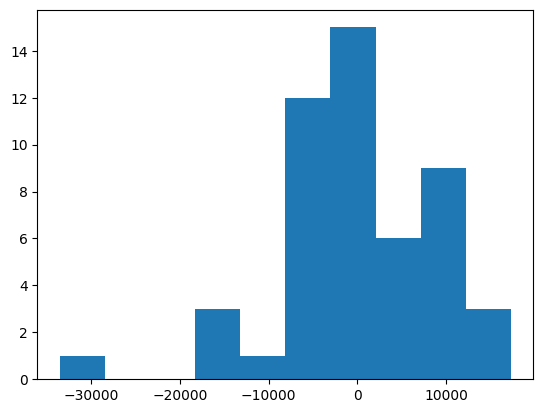

In [56]:
plt.hist(final_model.resid)

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([-33533.7341113 , -16945.99633453, -16318.1199852 , -13497.97815763,
          -9399.76145684,  -6675.45685261,  -6589.6605712 ,  -6006.43164029,
          -5951.57418327,  -5124.72410995,  -4867.0353503 ,  -4822.07720781,
          -4810.92611314,  

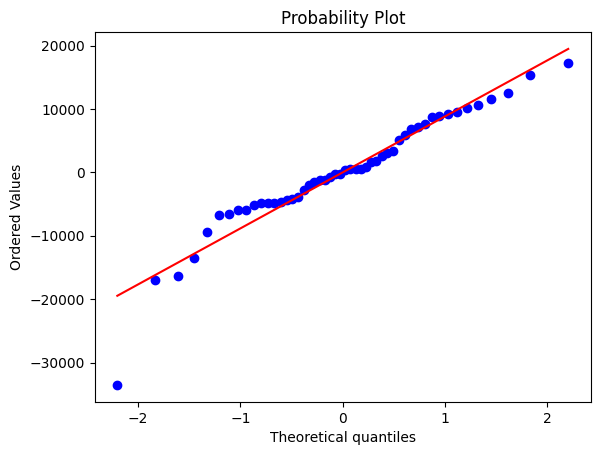

In [57]:
import pylab
import scipy.stats as st
st.probplot(final_model.resid, dist='norm', plot=pylab)

In [58]:
#builiding model using sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
reg=LinearRegression()
df_encoded.head()

,RD,Administration,MK,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [59]:
X= df_encoded.iloc[:,:3]
Y=df_encoded.iloc[:,3]

In [60]:
X.head()

,RD,Administration,MK
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [61]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
reg.fit(X_train, Y_train)
print(reg.intercept_)
print(reg.coef_)

42989.00816508665
[0.77884104 0.0293919  0.03471025]


In [63]:
pred_Y_train=reg.predict(X_train)
pred_Y_test=reg.predict(X_test)

In [64]:
RMSE_test= np.sqrt(np.mean((Y_test - pred_Y_test)**2))
RMSE_train= np.sqrt(np.mean((Y_train - pred_Y_train)**2))

In [65]:
print(RMSE_test)
print(RMSE_train)

8803.775790469354
9052.267248800474


In [66]:
from sklearn.metrics import r2_score
r2_train= r2_score(Y_train,pred_Y_train)
r2_test = r2_score(Y_test, pred_Y_test)
print(r2_train,' ',r2_test )

0.9499572530324031   0.9393955917820569


#MODEL 1= (Profit~ RD+ Administration+ MK +State_California + State_Florida + State_New_York) = r2, r2_adj=(0.951, 0.945)
#MODEL 2 = (Profit~ RD+ Administration+ MK ) = r2, r2_adj=(0.9507, 0.947)
#MODEL 3 = (Profit~ RD+ Administration)  = r2, r2_adj=(0.947, 0.9455)
#MODEL 4 = (Profit~ Administration+ MK) = r2, r2_adj=(0.6, 0.59)
#MODEL 5 = (Profit~ RD+ MK)  = r2, r2_adj=(0.9504, 0.948)

# Using Sklearn
#r2_score_test = 0.93
#r2_score_train = 0.9499

In [172]:
# even by performing square root transformation  on independent variables the accuracy reduced to 90% and by performing log transformation accuracy decreased to 73%

#Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [68]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [69]:
Corolla=pd.read_csv('ToyotaCorolla.csv', encoding='iso-8859-1')

In [70]:
Corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [71]:
Corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [72]:
Corolla.shape

(1436, 38)

In [73]:
Corolla.tail()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,0,1,0,0,0,0,0,0,0


In [74]:
Corolla.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [75]:
#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
new_df=pd.DataFrame()
new_df[['Age_08_04', 'KM', 'HP','cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight', 'Price']] = Corolla[['Age_08_04', 'KM', 'HP','cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight', 'Price']]
new_df.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [76]:
new_df.shape

(1436, 9)

In [77]:
new_df.duplicated().sum()

1

In [78]:
new_df[new_df.duplicated()]

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
113,8,13253,116,2000,5,5,234,1320,24950


In [79]:
new_df[(new_df['KM']==13253) & (new_df['HP']==116) & (new_df['Quarterly_Tax']==234)]

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
112,8,13253,116,2000,5,5,234,1320,24950
113,8,13253,116,2000,5,5,234,1320,24950


In [80]:
new_df.drop_duplicates()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


In [81]:
new_df.HP.unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73])

In [82]:
new_df.isnull().sum()

Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
Price            0
dtype: int64

In [83]:
new_df.dtypes

Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
Price            int64
dtype: object

In [84]:
new_df.KM.skew()

1.0159121980877577

In [85]:
new_df.HP.skew()

0.9558356472519488

In [86]:
new_df.cc.skew()

27.431792795981686

In [87]:
new_df.Quarterly_Tax.skew()

1.993833864547599

In [88]:
new_df.Weight.skew()

3.108639394626062

In [89]:
new_df.Price.skew()

1.7038849799952995

In [90]:
new_df.columns

Index(['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight', 'Price'],
      dtype='object')

<ipython-input-91-95b1f636debf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df.Price)


<Axes: xlabel='Price', ylabel='Density'>

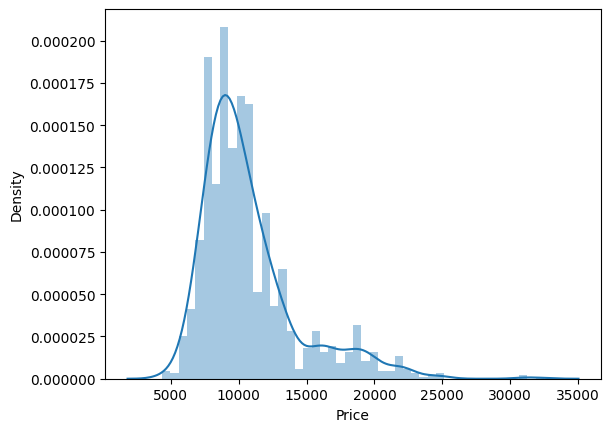

In [91]:
sns.distplot(new_df.Price)

Text(0.5, 1.0, 'Price')

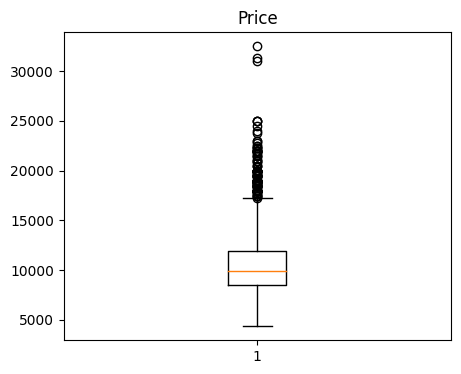

In [92]:
plt.figure(figsize=(5,4))

plt.boxplot(new_df.Price)
plt.title('Price')

Text(0.5, 1.0, 'Weight')

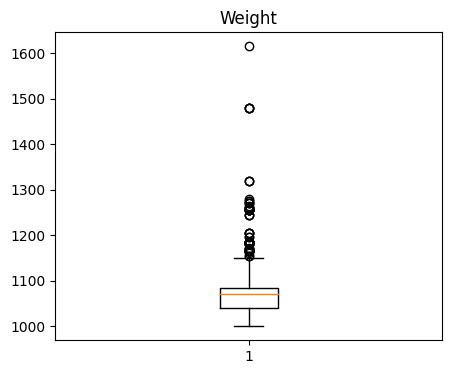

In [93]:
plt.figure(figsize=(5,4))

plt.boxplot(new_df.Weight)
plt.title('Weight')

Text(0.5, 1.0, 'Quarterly_Tax')

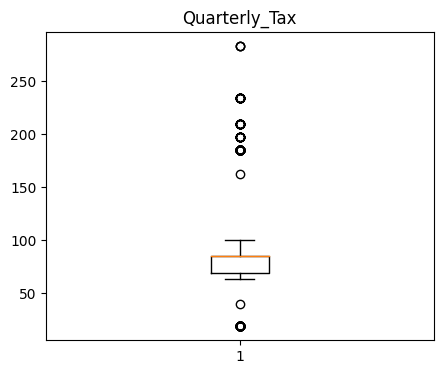

In [94]:
plt.figure(figsize=(5,4))

plt.boxplot(new_df.Quarterly_Tax)
plt.title('Quarterly_Tax')

Text(0.5, 1.0, 'CC')

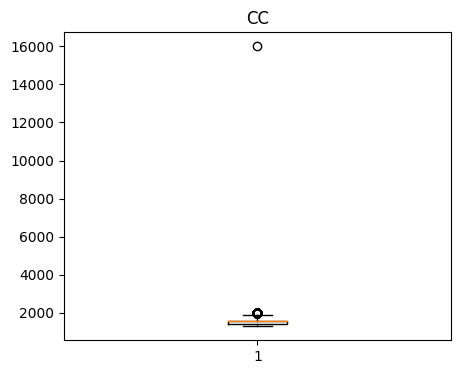

In [95]:
plt.figure(figsize=(5,4))

plt.boxplot(new_df.cc)
plt.title('CC')

Text(0.5, 1.0, 'HP')

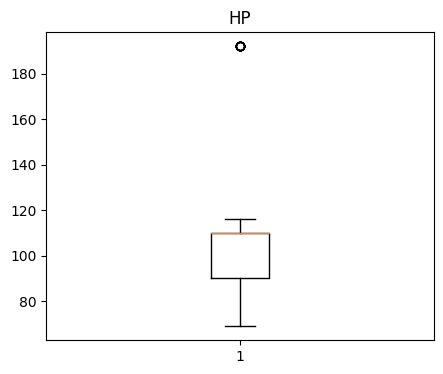

In [96]:
plt.figure(figsize=(5,4))

plt.boxplot(new_df.HP)
plt.title('HP')

Text(0.5, 1.0, 'KM')

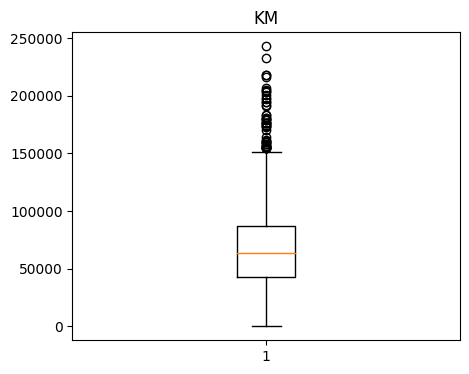

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(5,4))

plt.boxplot(new_df.KM)
plt.title('KM')

In [98]:
new_df.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [99]:
new_df.Age_08_04.skew()

-0.82670187309842

In [100]:
import statsmodels.formula.api as smf
model1= smf.ols('Price~ Age_08_04+ KM+ HP+ cc+ Doors+ Gears+Quarterly_Tax+ Weight', data=new_df).fit()
(model1.rsquared, model1.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

In [101]:
model1.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [102]:
model1.pvalues

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

In [103]:
# since the skewness of the independent variables is greater than 1 we can apply log transformation to overcome this
#By applying log transformation
import numpy as np
trans1_df=pd.DataFrame()
trans1_df[['KM','HP','cc','Quarterly_Tax','Weight']] = np.log(new_df[['KM','HP','cc','Quarterly_Tax','Weight']])
trans1_df[['Doors', 'Gears','Price']] = new_df[['Doors', 'Gears','Price']]
trans1_df['Age_08_04'] = (new_df['Age_08_04']**2)
trans1_df.head()

,KM,HP,cc,Quarterly_Tax,Weight,Doors,Gears,Price,Age_08_04
0,10.757605,4.49981,7.600902,5.347108,7.060476,3,5,13500,529
1,11.197351,4.49981,7.600902,5.347108,7.060476,3,5,13750,529
2,10.638520,4.49981,7.600902,5.347108,7.060476,3,5,13950,576
3,10.778956,4.49981,7.600902,5.347108,7.060476,3,5,14950,676
4,10.558414,4.49981,7.600902,5.347108,7.064759,3,5,13750,900


In [104]:
trans1_df.Weight.skew()

2.4429717215050877

In [105]:
model2=smf.ols('Price~ KM+ HP+ cc+ Quarterly_Tax+ Weight+ Doors	+ Gears+ Age_08_04', data=trans1_df).fit()
(model2.rsquared, model2.rsquared_adj)    # accuracy decreased by applying log transformation

(0.809219938313986, 0.8081503934692151)

In [106]:
model2.params

Intercept       -182916.917304
KM                 -579.310030
HP                 4623.296322
cc                -4162.690003
Quarterly_Tax       395.653076
Weight            30129.668368
Doors              -100.849392
Gears               327.741476
Age_08_04            -1.126783
dtype: float64

In [107]:
model2.pvalues

Intercept         3.595761e-90
KM                4.871032e-35
HP                2.242463e-46
cc                1.117852e-21
Quarterly_Tax     8.480307e-04
Weight            3.870518e-90
Doors             3.502394e-02
Gears             1.562839e-01
Age_08_04        1.335444e-242
dtype: float64

In [108]:
trans1_df.corr()

,KM,HP,cc,Quarterly_Tax,Weight,Doors,Gears,Price,Age_08_04
KM,1.000000,-0.184735,0.061732,0.156603,-0.192302,-0.064817,0.023192,-0.519551,0.421255
HP,-0.184735,1.000000,0.059017,-0.250092,0.047029,0.101488,0.171410,0.294764,-0.135269
cc,0.061732,0.059017,1.000000,0.455619,0.611524,0.133882,0.039303,0.179848,-0.135743
Quarterly_Tax,0.156603,-0.250092,0.455619,1.000000,0.464526,0.109184,0.017110,0.168528,-0.153284
Weight,-0.192302,0.047029,0.611524,0.464526,1.000000,0.319605,0.022289,0.585331,-0.418133
Doors,-0.064817,0.101488,0.133882,0.109184,0.319605,1.000000,-0.160141,0.185326,-0.134577
Gears,0.023192,0.171410,0.039303,0.017110,0.022289,-0.160141,1.000000,0.063104,-0.017528
Price,-0.519551,0.294764,0.179848,0.168528,0.585331,0.185326,0.063104,1.000000,-0.811976
Age_08_04,0.421255,-0.135269,-0.135743,-0.153284,-0.418133,-0.134577,-0.017528,-0.811976,1.000000


In [109]:
x=pd.DataFrame(new_df, columns=['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'])
x.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [111]:
vif

,features,VIF
0,Age_08_04,16.392684
1,KM,7.590522
2,HP,64.894960
3,cc,17.199750
4,Doors,21.874692
5,Gears,438.631804
6,Quarterly_Tax,11.020074
7,Weight,543.133076


In [112]:
#By dividing values by 1
trans2_df=pd.DataFrame()
trans2_df[['KM','HP','cc','Quarterly_Tax','Weight']] = 1 / (new_df[['KM','HP','cc','Quarterly_Tax','Weight']])
trans2_df[['Doors', 'Gears','Price']] = new_df[['Doors', 'Gears','Price']]
trans2_df['Age_08_04'] = (new_df['Age_08_04']**2)
trans2_df.head()

,KM,HP,cc,Quarterly_Tax,Weight,Doors,Gears,Price,Age_08_04
0,0.000021,0.011111,0.0005,0.004762,0.000858,3,5,13500,529
1,0.000014,0.011111,0.0005,0.004762,0.000858,3,5,13750,529
2,0.000024,0.011111,0.0005,0.004762,0.000858,3,5,13950,576
3,0.000021,0.011111,0.0005,0.004762,0.000858,3,5,14950,676
4,0.000026,0.011111,0.0005,0.004762,0.000855,3,5,13750,900


In [113]:
model3=smf.ols('Price~ KM+ HP+ cc+ Quarterly_Tax+ Weight+ Doors	+ Gears+ Age_08_04', data=trans2_df).fit()
(model3.rsquared, model3.rsquared_adj)

(0.7980694571652125, 0.7969374008634057)

In [114]:
# finding square root of independent variables
trans3_df=pd.DataFrame()
trans3_df[['KM','HP','cc','Quarterly_Tax','Weight']] = np.sqrt(new_df[['KM','HP','cc','Quarterly_Tax','Weight']])
trans3_df[['Doors', 'Gears','Price']] = new_df[['Doors', 'Gears','Price']]
trans3_df['Age_08_04'] = (new_df['Age_08_04']**2)
trans3_df.head()

,KM,HP,cc,Quarterly_Tax,Weight,Doors,Gears,Price,Age_08_04
0,216.762543,9.486833,44.72136,14.491377,34.132096,3,5,13500,529
1,270.068510,9.486833,44.72136,14.491377,34.132096,3,5,13750,529
2,204.232710,9.486833,44.72136,14.491377,34.132096,3,5,13950,576
3,219.089023,9.486833,44.72136,14.491377,34.132096,3,5,14950,676
4,196.214169,9.486833,44.72136,14.491377,34.205263,3,5,13750,900


In [115]:
model4=smf.ols('Price~ KM+ HP+ cc+ Quarterly_Tax+ Weight+ Doors	+ Gears+ Age_08_04', data=trans3_df).fit()
(model4.rsquared, model4.rsquared_adj)

(0.829193177550043, 0.8282356060156354)

In [116]:
# finding cube root of independent variables
trans4_df=pd.DataFrame()
trans4_df[['KM','HP','cc','Quarterly_Tax','Weight']] = np.power((new_df[['KM','HP','cc','Quarterly_Tax','Weight']]), 1/3)
trans4_df[['Doors', 'Gears','Price']] = new_df[['Doors', 'Gears','Price']]
trans4_df['Age_08_04'] = (new_df['Age_08_04']**2)
trans4_df.head()

,KM,HP,cc,Quarterly_Tax,Weight,Doors,Gears,Price,Age_08_04
0,36.084677,4.481405,12.59921,5.943922,10.522251,3,5,13500,529
1,41.781366,4.481405,12.59921,5.943922,10.522251,3,5,13750,529
2,34.680355,4.481405,12.59921,5.943922,10.522251,3,5,13950,576
3,36.342412,4.481405,12.59921,5.943922,10.522251,3,5,14950,676
4,33.766567,4.481405,12.59921,5.943922,10.537282,3,5,13750,900


In [117]:
model5=smf.ols('Price~ KM+ HP+ cc+ Quarterly_Tax+ Weight+ Doors	+ Gears+ Age_08_04', data=trans4_df).fit()
(model5.rsquared, model5.rsquared_adj)

(0.8303693892841701, 0.8294184117889167)

In [118]:
# even after performing log, square-root, cube-root and 1/x transformation the accuracy didnt not improve
#by droping columns showing multi-collinearity
# Quarterly_Tax and weight shows collinearity
model6= smf.ols('Price~ Age_08_04+ KM+ HP+ cc+ Doors+ Gears+ Weight', data=new_df).fit() # droping Quarterly_Tax
(model6.rsquared, model6.rsquared_adj)

(0.8628951602234527, 0.8622230776755284)

In [119]:
model7= smf.ols('Price~ Age_08_04+ HP+ cc+ Doors+ Gears+Quarterly_Tax ', data=new_df).fit()  # droping weight and KM
(model7.rsquared, model7.rsquared_adj)

(0.8151211193517621, 0.8143448609305659)

In [120]:
model8= smf.ols('Price~ Age_08_04+Weight+ HP+ Gears', data=new_df).fit()    #droping Quarterly_Tax, cc and doors
(model8.rsquared, model8.rsquared_adj)

(0.8365148013356496, 0.836057819648258)

In [121]:
# by scaling the values
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
trans5_df=pd.DataFrame()
trans5_df[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight','Price']] = scaler.fit_transform(new_df)

In [122]:
trans5_df.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,0.278481,0.193355,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293,0.325044
1,0.278481,0.300149,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293,0.333925
2,0.291139,0.171647,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293,0.341030
3,0.316456,0.197528,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293,0.376554
4,0.367089,0.158433,0.170732,0.047619,0.333333,0.666667,0.723485,0.276423,0.333925


In [123]:
model9= smf.ols('Price~ Age_08_04+ KM+ HP+cc+Doors+Gears+ Quarterly_Tax+ Weight', data=trans5_df).fit()
(model9.rsquared, model9.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

In [124]:
pred1=model9.predict(trans5_df)
pred1

0       0.442720
1       0.423529
2       0.442300
3       0.429005
4       0.421756
          ...   
1431    0.157860
1432    0.140012
1433    0.145801
1434    0.150197
1435    0.215007
Length: 1436, dtype: float64

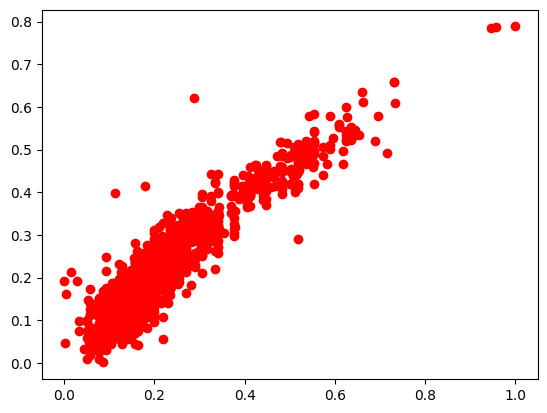

In [125]:
plt.scatter(trans5_df.Price, pred1, c='r')

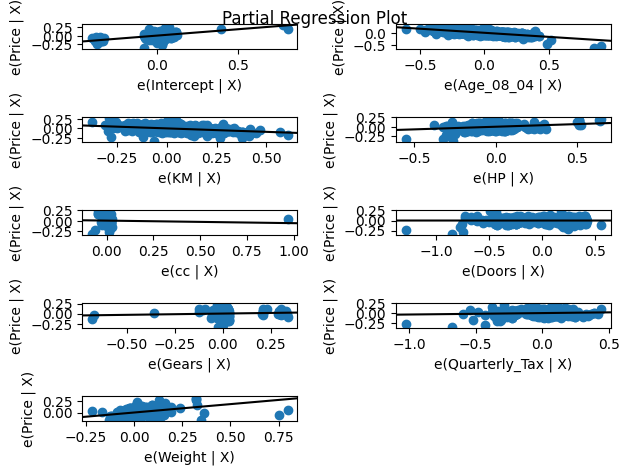

<Figure size 1200x1200 with 0 Axes>

In [174]:
#model 1 is giving a highest accuracy
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model9)
plt.figure(figsize=(12,12))
plt.show();

((array([-3.30049245, -3.04294913, -2.89970643, ...,  2.89970643,
          3.04294913,  3.30049245]),
  array([-0.33273258, -0.28562702, -0.2365005 , ...,  0.21126447,
          0.22441126,  0.2289173 ])),
 (0.04675692267325677, 3.265538704219346e-16, 0.9815340189403622))

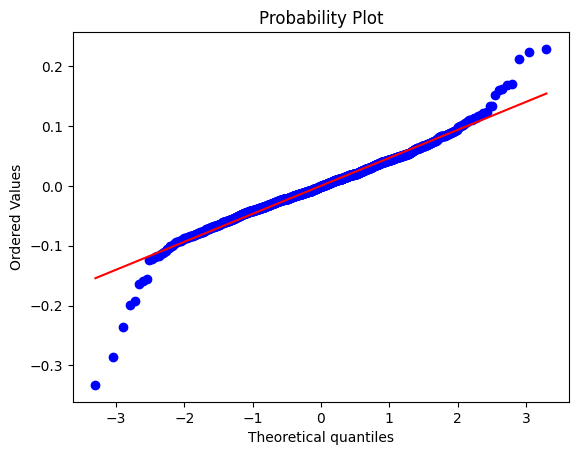

In [127]:
import pylab
import scipy.stats as st
st.probplot(model9.resid, dist='norm', plot=pylab)

In [128]:
#using sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
reg_model=LinearRegression()
trans5_df.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,0.278481,0.193355,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293,0.325044
1,0.278481,0.300149,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293,0.333925
2,0.291139,0.171647,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293,0.341030
3,0.316456,0.197528,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293,0.376554
4,0.367089,0.158433,0.170732,0.047619,0.333333,0.666667,0.723485,0.276423,0.333925


In [129]:
X=trans5_df.iloc[:, :8]
Y=trans5_df.iloc[:, 8]
X.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.278481,0.193355,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
1,0.278481,0.300149,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
2,0.291139,0.171647,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
3,0.316456,0.197528,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
4,0.367089,0.158433,0.170732,0.047619,0.333333,0.666667,0.723485,0.276423


In [130]:
Y.head()

0    0.325044
1    0.333925
2    0.341030
3    0.376554
4    0.333925
Name: Price, dtype: float64

In [131]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=0)
reg_model.fit(X_train, Y_train)

LinearRegression()

In [132]:
p1_test=reg_model.predict(X_test)
p2_train=reg_model.predict(X_train)

In [133]:
from sklearn.metrics import r2_score
r2_score_train= r2_score(Y_train,p2_train )
r2_score_test= r2_score(Y_test,p1_test)
print(r2_score_train,' ',r2_score_test )

0.8737898828869015   0.5995582859225146


In [134]:
# the vif of weight was found to be the highest, hence will build model by droping weight column
trans5_df.head(2)

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,0.278481,0.193355,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293,0.325044
1,0.278481,0.300149,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293,0.333925


In [135]:
x=trans5_df.iloc[:, :7] # by droping weight column
y=trans5_df.iloc[:, 8]
x.head(2)

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax
0,0.278481,0.193355,0.170732,0.047619,0.333333,0.666667,0.723485
1,0.278481,0.300149,0.170732,0.047619,0.333333,0.666667,0.723485


In [136]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)
reg_model.fit(x_train, y_train)

LinearRegression()

In [137]:
pr1_test=reg_model.predict(x_test)
pr2_train=reg_model.predict(x_train)

In [138]:
R2_score_train= r2_score(y_train,pr2_train )
R2_score_test= r2_score(y_test,pr1_test)
print(R2_score_train,' ',R2_score_test )       # accuracy of test data set increased from 60% to 82% by droping weight column

0.8415217394334837   0.8269909208183571


In [139]:
#model1 using all independent variables without transformation= 86% accuracy
#model2 - applying log transformation = 80% accuracy
#model3 - applying 1/x transformation = 79% accuracy
#model4 - applying square-root transformation = 83% accuracy
# model5 - applying cube-root transformation = 83% accuracy
# model6 - dropping Quarterly_Tax = 86% accuracy
# model9  - by scaling using MinMaxScaler = 86.3% accuracy


# using sklearn
# including all = train accuracy=87%, test accuracy=60%
# droping weight column = train accuracy=84%, test accuracy=82%